In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
home_color = cv2.imread("home_color.png")
home_gray = cv2.cvtColor(home_color, cv2.COLOR_BGR2GRAY)

In [72]:
cv2.imshow("home_color", home_color)
cv2.imshow("home_gray", home_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
hist = cv2.calcHist([home_gray], [0], None, [256], [0, 256])

## 绘制单张灰度直方图 空心图

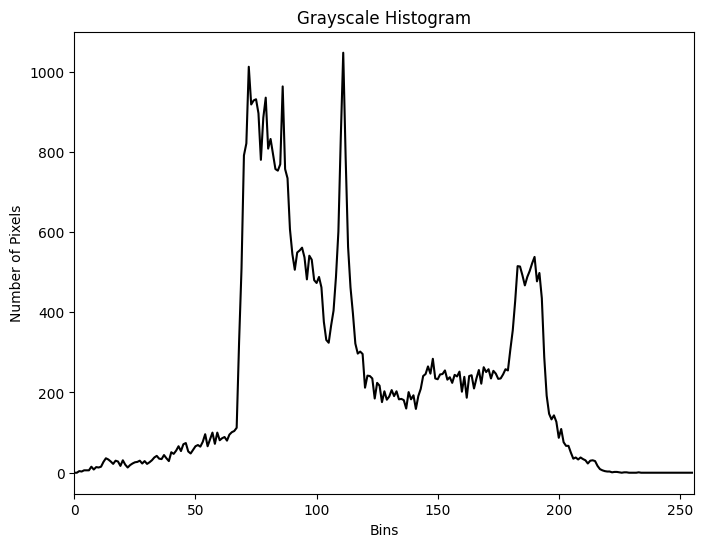

In [74]:
# 绘制灰度直方图
plt.figure(figsize=(8, 6))
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('Number of Pixels')
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.show()

## 画出灰度化图像home_gray的灰度直方图，并拼接原灰度图与结果图；

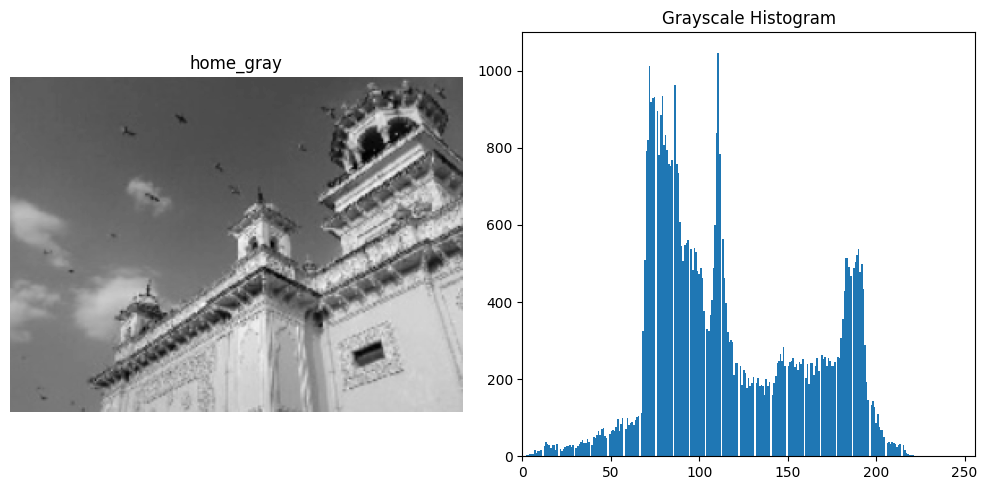

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('home_gray')
plt.imshow(home_gray,cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale Histogram')
plt.hist(home_gray.ravel(), bins=256)
plt.xlim([0, 256])


plt.tight_layout()
plt.show()

## 画出彩色、灰色图像的直方图，并拼接原图与结果图

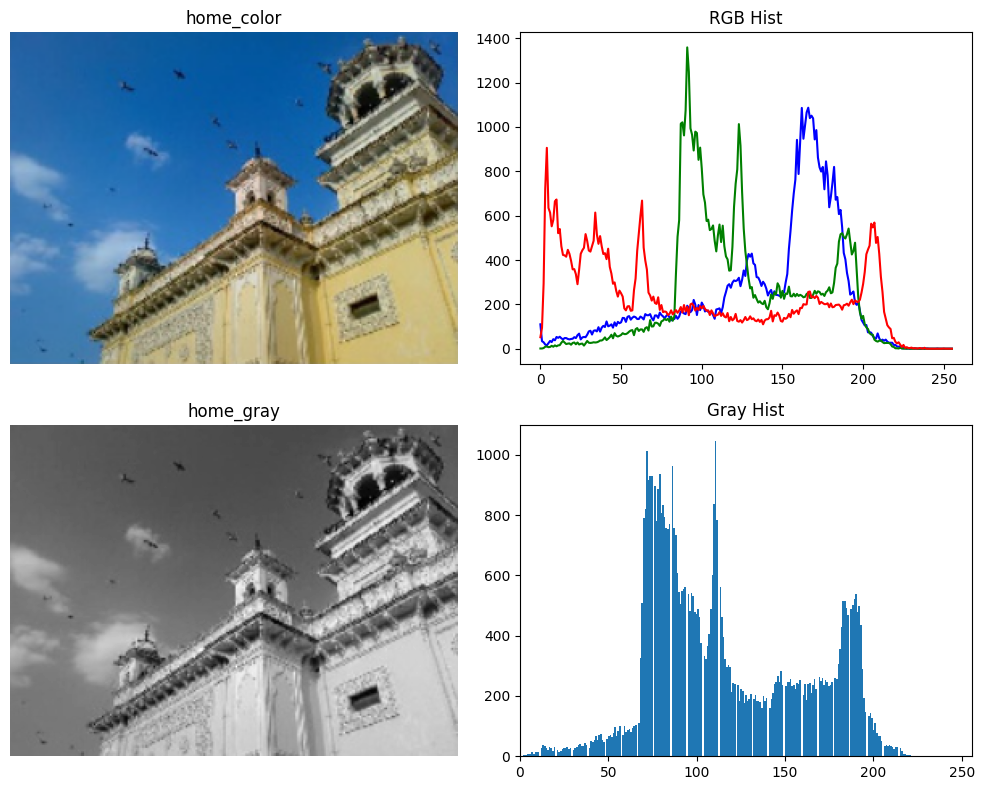

In [40]:
plt.figure(figsize=(10, 8))
# 显示原图
b, g, r = cv2.split(home_color)
img = cv2.merge([r, g, b])

plt.subplot(2, 2, 1)
plt.title('home_color')
plt.imshow(img)
plt.axis('off')

# 彩色图的直方图
histb = cv2.calcHist([home_color], [0], None, [256], [0,255])
histg = cv2.calcHist([home_color], [1], None, [256], [0,255])
histr = cv2.calcHist([home_color], [2], None, [256], [0,255])

plt.subplot(2, 2, 2) 
plt.title('RGB Hist')
plt.plot(histb, color='b')
plt.plot(histg, color='g')
plt.plot(histr, color='r')

plt.subplot(2, 2, 3)
plt.title('home_gray')
plt.imshow(home_gray,cmap='gray')
plt.axis('off')

# 灰度直方图
plt.subplot(2, 2, 4)
plt.title('Gray Hist')
plt.hist(home_gray.ravel(), bins=256)
plt.xlim([0, 256])

plt.tight_layout()
plt.show()




### 实心彩色直方图

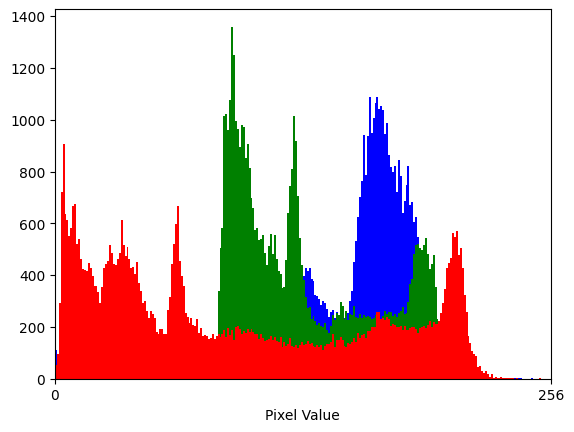

In [90]:

n_bins = 256  
hist_range = [0, 256] 
hists = []
channels = {0: "blue", 1:"green", 2: "red"}
for ch in channels:
    hist = cv2.calcHist([home_color], channels=[ch], mask=None, histSize=[n_bins], ranges=hist_range)
    hist = hist.squeeze(axis=-1)
    hists.append(hist)
 
def plot_hist(bins, hist, color):
    centers = (bins[:-1] + bins[1:]) / 2
    widths = np.diff(bins)
    ax.bar(centers, hist, width=widths, color=color)
 
bins = np.linspace(*hist_range, n_bins + 1)
fig, ax = plt.subplots()

ax.set_xticks([0, 256])
ax.set_xlim([0, 256])
ax.set_xlabel("Pixel Value")

for hist, color in zip(hists, channels.values()):
    plot_hist(bins, hist, color=color)


plt.show()


## 画出ROI（感兴趣区域 ）的直方图，ROI区域为 x：50-100，y：100-200，将原图home_color，ROI的mask图，ROI提取后的图及其直方图放在一个窗口内显示。

In [33]:
mask = np.zeros_like(home_color)
mask[100:200, 50:100] = 255

roi = cv2.bitwise_and(home_color, mask)

cv2.imshow("mask", mask)
cv2.imshow("roi", roi)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# 计算ROI的直方图
histmask_b = cv2.calcHist([home_color], [0], mask_gray, [256], [0, 255])
histmask_g = cv2.calcHist([home_color], [1], mask_gray, [256], [0, 255])
histmask_r = cv2.calcHist([home_color], [2], mask_gray, [256], [0, 255])


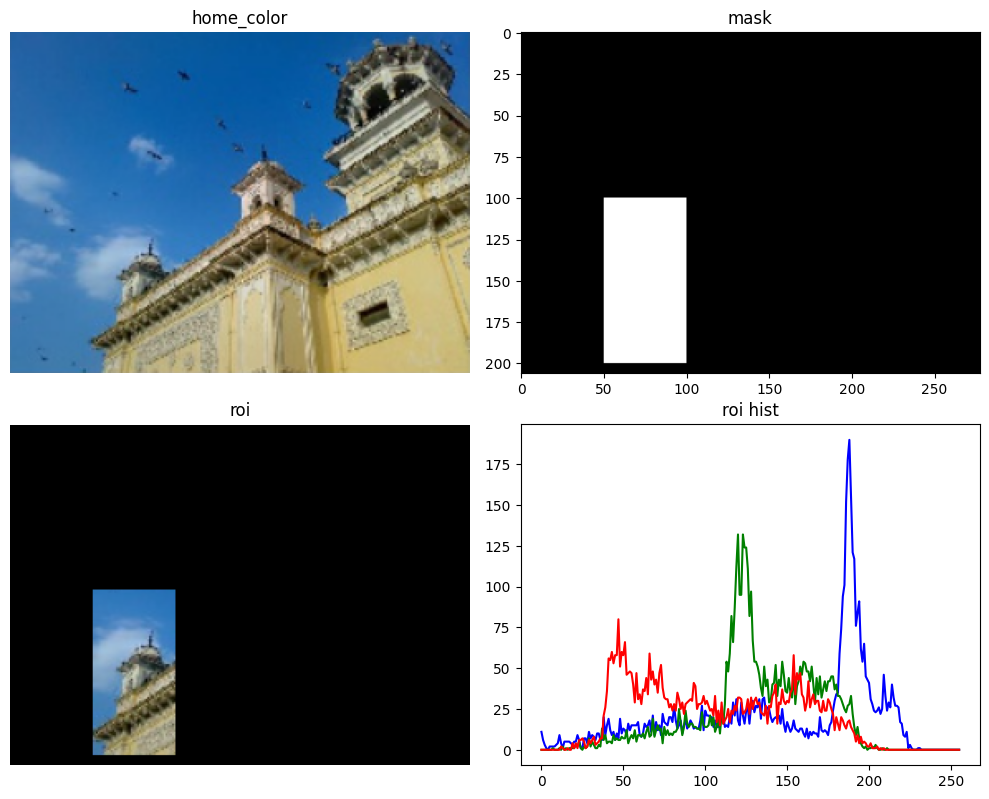

In [42]:

plt.figure(figsize=(10, 8))
# 显示原图
b, g, r = cv2.split(home_color)
img = cv2.merge([r, g, b])

plt.subplot(2, 2, 1)
plt.title('home_color')
plt.imshow(img)
plt.axis('off')

# 显示mask
plt.subplot(2, 2, 2)
plt.title('mask')
plt.imshow(mask)

# 显示ROI提取后的图
b, g, r = cv2.split(roi)
roi1 = cv2.merge([r, g, b])

plt.subplot(2, 2, 3)
plt.title('roi')
plt.imshow(roi1)
plt.axis('off')

# ROI直方图
plt.subplot(2, 2, 4)
plt.title('roi hist')
plt.plot(histmask_b, color='b')
plt.plot(histmask_g, color='g')
plt.plot(histmask_r, color='r')
cv2.waitKey(0)

plt.tight_layout()
plt.show()